# Reading External data & Plotting

[Source](https://blockchain.info/charts/market-price)

## Let's start!

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

Pandas can easily read data stored in different file formats like CSV, JSON, XML or even Excel. Parsing always involves specifying the correct structure, encoding and other details. The read_csv method reads CSV files and accepts many parameters.

In [2]:
pd.read_csv?

In [3]:
df = pd.read_csv('btc-market-price.csv')

In [4]:
df.head()

,2017-04-02 00:00:00,1099.169125
0,2017-04-03 00:00:00,1141.813000
1,2017-04-04 00:00:00,1141.600363
2,2017-04-05 00:00:00,1133.079314
3,2017-04-06 00:00:00,1196.307937
4,2017-04-07 00:00:00,1190.454250


The CSV file we're reading has only two columns: `timestamp` and `price`. It doesn't have a header, it contains whitespaces and has values separated by commas. pandas automatically assigned the first row of data as headers, which is incorrect. We can overwrite this behavior with the `header` parameter:

In [5]:
df = pd.read_csv('btc-market-price.csv', header=None) 

In [6]:
df.head()

,0,1
0,2017-04-02 00:00:00,1099.169125
1,2017-04-03 00:00:00,1141.813000
2,2017-04-04 00:00:00,1141.600363
3,2017-04-05 00:00:00,1133.079314
4,2017-04-06 00:00:00,1196.307937


We can then set the names of each column explicitely by setting the `df.columns` attribute:

In [7]:
df.columns = ['Timestamp', 'Price']

In [8]:
df.head()

,Timestamp,Price
0,2017-04-02 00:00:00,1099.169125
1,2017-04-03 00:00:00,1141.813000
2,2017-04-04 00:00:00,1141.600363
3,2017-04-05 00:00:00,1133.079314
4,2017-04-06 00:00:00,1196.307937


In [13]:
df.shape

(365, 2)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Timestamp  365 non-null    object 
 1   Price      365 non-null    float64
dtypes: float64(1), object(1)
memory usage: 5.8+ KB


In [16]:
df.tail(3)

,Timestamp,Price
362,2018-03-30 00:00:00,6882.531667
363,2018-03-31 00:00:00,6935.480000
364,2018-04-01 00:00:00,6794.105000


In [18]:
df.dtypes

Timestamp     object
Price        float64
dtype: object

The type of `Price` column was correctly interpreted as `float`, but the `Timestamp` was interpreted as a regular string (`object` in pandas notation):

In [19]:
pd.to_datetime(df['Timestamp']).head()

0   2017-04-02
1   2017-04-03
2   2017-04-04
3   2017-04-05
4   2017-04-06
Name: Timestamp, dtype: datetime64[ns]

In [20]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

In [21]:
df.head()

,Timestamp,Price
0,2017-04-02,1099.169125
1,2017-04-03,1141.813000
2,2017-04-04,1141.600363
3,2017-04-05,1133.079314
4,2017-04-06,1196.307937


In [22]:
df.dtypes

Timestamp    datetime64[ns]
Price               float64
dtype: object

In [ ]:
# setting our Timestamp as our key value
df.set_index('Timestamp', inplace=True)

In [27]:
df.head()

,Price
Timestamp,
2017-04-02,1099.169125
2017-04-03,1141.813000
2017-04-04,1141.600363
2017-04-05,1133.079314
2017-04-06,1196.307937


In [31]:
df.loc['2017-04-03']

Price    1141.813
Name: 2017-04-03 00:00:00, dtype: float64

## Putting everything together
And now, we've finally arrived to the final, desired version of the `DataFrame` parsed from our  CSV file. The steps were:

In [33]:
df = pd.read_csv('btc-market-price.csv', header=None)
df.columns = ['Timestamp', 'Price']
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df.set_index('Timestamp', inplace=True)

In [34]:
df.head()

,Price
Timestamp,
2017-04-02,1099.169125
2017-04-03,1141.813000
2017-04-04,1141.600363
2017-04-05,1133.079314
2017-04-06,1196.307937


#### There should be a better way:
The `read_csv` function is extremely powerful and you can specify many more parameters at import time. We can achive the same results with only one line by doing:

In [35]:
df = pd.read_csv(
    'btc-market-price.csv',
    header = None,
    names = ['Timestamp', 'Prices'],
    index_col=0,
    parse_dates=True
)

In [36]:
df.head()

,Prices
Timestamp,
2017-04-02,1099.169125
2017-04-03,1141.813000
2017-04-04,1141.600363
2017-04-05,1133.079314
2017-04-06,1196.307937


## Plotting basics
`pandas` integrates with Matplotlib and creating a plot is as simple as:

<Axes: xlabel='Timestamp'>

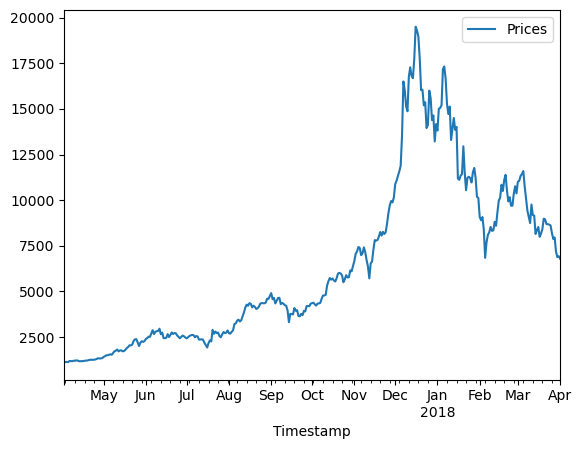

In [37]:
df.plot()

Behind the scenes, it's using `matplotlib.pyplot`'s interface. We can create a similar plot with the `plt.plot()` function:

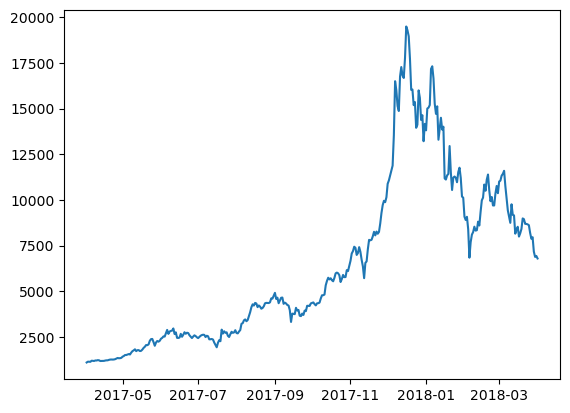

In [39]:
plt.plot(df.index, df['Prices'])

In [40]:
x = np.arange(-10, 11)

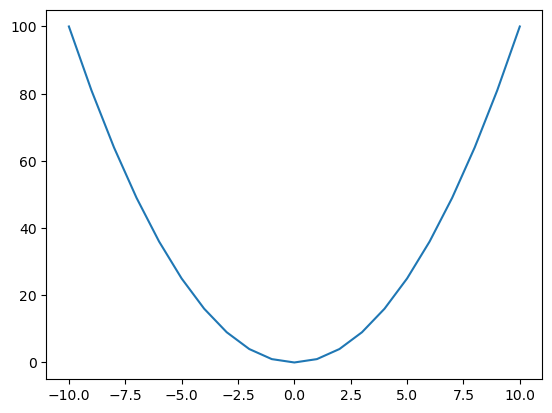

In [41]:
plt.plot(x, x**2)